In [2]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [1]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [10]:
concaternated_df = pd.read_csv("실험/upper_china_concaternated_df.csv")
concaternated_df

,timestamp,longitude,latitude,speed
0,1.666833e+09,118.339289,38.870474,13.915789
1,1.666833e+09,118.340000,38.870311,13.916368
2,1.666833e+09,118.340711,38.870148,13.916946
3,1.666833e+09,118.341422,38.869986,13.917524
4,1.666833e+09,118.342132,38.869823,13.918102
...,...,...,...,...
9995,1.667028e+09,128.861929,34.903714,9.662492
9996,1.667028e+09,128.861528,34.904533,9.670553
9997,1.667028e+09,128.861128,34.905352,9.678614
9998,1.667028e+09,128.860727,34.906171,9.686676


# 알고리즘 test
## Test 데이터 로딩

In [11]:
test_df = pd.read_csv("실험/cosco_fos_26_processed.csv")

In [12]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - hour) * 60)
    second = ((distance / km_h - hour) * 60 - minute) * 60
    duration = datetime.timedelta(hours=hour,minutes=minute, seconds=second)
    return duration

In [8]:
test_df

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance
0,253,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919
1,254,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705
2,255,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991
3,256,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184
4,257,COSCO FOS,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,515,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854
263,516,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367
264,517,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086
265,518,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448


In [13]:
concaternated_df

,timestamp,longitude,latitude,speed
0,1.666833e+09,118.339289,38.870474,13.915789
1,1.666833e+09,118.340000,38.870311,13.916368
2,1.666833e+09,118.340711,38.870148,13.916946
3,1.666833e+09,118.341422,38.869986,13.917524
4,1.666833e+09,118.342132,38.869823,13.918102
...,...,...,...,...
9995,1.667028e+09,128.861929,34.903714,9.662492
9996,1.667028e+09,128.861528,34.904533,9.670553
9997,1.667028e+09,128.861128,34.905352,9.678614
9998,1.667028e+09,128.860727,34.906171,9.686676


##### '가는 길인데 굳이 오래 돌아갈 필요는 없잖아' 알고리즘

현재 위치의 좌표
현재 위치에서 가장 가까운 위치의 좌표   

   

- current_position(posi_c) = (latitude_c, longitude_c) (current vessel's position by AIS data)
- shortest_index(i) = shortest_position's index (가장 가까운 지점의 인덱스 값)
- shortest_position(posi_i) = (latitude_i, longitude_i)
- shortest_distance(min_d) = euclidean distance (posi_c - posi_i)
- nth_index(n) = nth index(n번째 인덱스) , n>i
- nth_position(posi_n) = (latitude_n, longitude_n)
- distance (d_n) = euclidean distance (posi_c - posi_n)
- paths_distance(pd) = sum(euclidean distance (posi_i - posi_i+1) + euclidean distance (posi_i+1 - posi_i+2) + ... + euclidean distance (posi_n-1 - posi_n))

##### pseudocode   

posi_c = (latitude_c, longitude_c)   
posi_i = (latitude_i, longitude_i)   
min_d = euclidean distance (posi_c - posi_i)   

WHILE start   
   nth_position(posi_n) = (latitude_n, longitude_n)   
   distance =  euclidean distance (posi_c - posi_n)   
   paths_distance = sum(euclidean distance (posi_i - posi_i+1) + euclidean distance (posi_i+1 - posi_i+2) + ... + euclidean distance (posi_n-1 - posi_n))   
   min_d = d   
   if distance < (paths_distance + min_d):   
      optimal_position = posi_n
      break   
   else:   
       n = n + 1   
WHILE end   



# 현재 선박의 크기나 특성에 맞게 대표항로를 구한게 아니라 전체 대표항로를 이용해서 만들었기 때문에 전체 ETA가 많이 느릴 수 있음.

# timestamp로 할지, time_position_received로할지 생각

In [44]:
# 가는 길인데 굳이 오래 돌아갈 필요는 없잖아 알고리즘
def optimal_next_point(current_position, shortest_point_idx, shortest_distance,
                       path_df):
    posi_c = current_position
    latitude_i = path_df.loc[shortest_point_idx, "latitude"]
    longitude_i = path_df.loc[shortest_point_idx, "longitude"]
    posi_i = (latitude_i, longitude_i)
    min_d = shortest_distance
    n = shortest_point_idx + 1
    while True:
        try:
            latitude_n = path_df.loc[n, "latitude"]
            longitude_n = path_df.loc[n, "longitude"]
            posi_n = (latitude_n, longitude_n)
            distance = haversine(posi_c, posi_n, unit="km")
            if n == shortest_point_idx + 1:
                path_distance = haversine(posi_i, posi_n, unit="km")
                paths_distance = path_distance
            else:
                path_distance = haversine(posi_n, posi_previous_n, unit="km")
                paths_distance += path_distance

            if distance < (paths_distance + min_d):
                optimal_next_point_idx = n
                return optimal_next_point_idx
            elif n == path_df.index[-1]:
                print("no better optimal_point")
                return shortest_point_idx + 1
            else:
                n = n + 1
                posi_previous_n = posi_n
        except:
            print("no better optimal_point")
            return shortest_point_idx + 1

In [48]:
test_df["timestamp"] = pd.to_datetime(test_df["timestamp"])
for col in test_df.index:
    longitude = test_df.loc[col,"longitude"]
    latitude = test_df.loc[col,"latitude"]
    current_timestamp = test_df.loc[col,"timestamp"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = test_df.loc[col,"speed"]
    current_timestamp = test_df.loc[col,"timestamp"]
    
    # 현재 위치에서 가장 가까운 지점 찾기
    shortest_distance = 999
    for col2 in concaternated_df.index:
        lon2 = concaternated_df.loc[col2, "longitude"]
        lat2 = concaternated_df.loc[col2, "latitude"]
        
        point2 = (lat2, lon2)
        distance = haversine(current_point, point2, unit="km")
        # 가장 짧은 지점 간의 거리, index 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = col2
    
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, concaternated_df)
    if optimal_point_idx >= concaternated_df.index[-1]:
        continue
    lon_optimal = concaternated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = concaternated_df.loc[optimal_point_idx, "latitude"]

    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    speed_damping_ratio = 1
    
    remained_paths_df = concaternated_df[optimal_point_idx + 1:]
    remained_paths_df.reset_index(inplace=True, drop=True)
    
    accu_durations = 0
    for idx in remained_paths_df.index:
        if idx != 0:
            LONGITUDE = remained_paths_df.loc[idx, "longitude"]
            LATITUDE = remained_paths_df.loc[idx, "latitude"]
            current_speed = remained_paths_df.loc[idx, "speed"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_paths_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_paths_df.loc[idx - 1, "latitude"]
            previous_speed = remained_paths_df.loc[idx - 1, "speed"]
            
            previous_current_coord = (LATITUDE, LONGITUDE)
            distance = haversine(current_coord, previous_current_coord, unit="km")
            km_h = (current_speed +previous_speed ) / 2 * 1.852
            accu_durations += distance / km_h
            
    accu_durations = datetime.timedelta(seconds=accu_durations* 86400)
    total_duration = init_duration + accu_durations
    ETA = current_timestamp + total_duration
    ATA = pd.to_datetime(test_df.loc[test_df.index[-1],"timestamp"])
    error = abs(ETA-ATA)
    test_df.loc[col, "ETA"] = ETA
    test_df.loc[col, "ATA"] = ATA
    test_df.loc[col, "error"] = error
    

no better optimal_point


In [49]:
test_df

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error
0,253,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,2023-01-01 21:07:35.737102,2022-11-21 16:50:10.106911,41 days 04:17:25.630191
1,254,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,2023-01-01 16:36:15.674014,2022-11-21 16:50:10.106911,40 days 23:46:05.567103
2,255,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,2023-01-01 12:34:55.933506,2022-11-21 16:50:10.106911,40 days 19:44:45.826595
3,256,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,2023-01-01 10:23:44.796414,2022-11-21 16:50:10.106911,40 days 17:33:34.689503
4,257,COSCO FOS,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,2023-01-01 04:08:52.097066,2022-11-21 16:50:10.106911,40 days 11:18:41.990155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,515,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,2022-11-22 06:57:30.096160,2022-11-21 16:50:10.106911,0 days 14:07:19.989249
263,516,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,2022-11-22 00:32:29.082587,2022-11-21 16:50:10.106911,0 days 07:42:18.975676
264,517,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,2022-11-21 22:21:46.212001,2022-11-21 16:50:10.106911,0 days 05:31:36.105090
265,518,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.8493,34.8922,9.4,340.0,2022-11-21 16:35:01.296680,2022-11-21 07:14:04,2022-11-21 07:13:06,under way using engine,9.026448,2022-11-21 17:59:22.183226,2022-11-21 16:50:10.106911,0 days 01:09:12.076315


# 알고리즘 사용 x

In [50]:
test_df["timestamp"] = pd.to_datetime(test_df["timestamp"])
for col in test_df.index:
    longitude = test_df.loc[col,"longitude"]
    latitude = test_df.loc[col,"latitude"]
    current_timestamp = test_df.loc[col,"timestamp"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = test_df.loc[col,"speed"]
    current_timestamp = test_df.loc[col,"timestamp"]
    
    # 현재 위치에서 가장 가까운 지점 찾기
    shortest_distance = 999
    for col2 in concaternated_df.index:
        lon2 = concaternated_df.loc[col2, "longitude"]
        lat2 = concaternated_df.loc[col2, "latitude"]
        
        point2 = (lat2, lon2)
        distance = haversine(current_point, point2, unit="km")
        # 가장 짧은 지점 간의 거리, index 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = col2
    
    
    lon_optimal = concaternated_df.loc[shortest_point_idx + 1, "longitude"]
    lat_optimal = concaternated_df.loc[shortest_point_idx + 1, "latitude"]

    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    speed_damping_ratio = current_speed / concaternated_df.loc[shortest_point_idx + 1, "speed"]
    km_h = current_speed * 1.852 * speed_damping_ratio
    init_duration = cal_duration(km_h, optimal_distance)
    
    
    
    remained_paths_df = concaternated_df[optimal_point_idx + 1:]
    remained_paths_df.reset_index(inplace=True, drop=True)
    
    accu_durations = 0
    for idx in remained_paths_df.index:
        if idx != 0:
            LONGITUDE = remained_paths_df.loc[idx, "longitude"]
            LATITUDE = remained_paths_df.loc[idx, "latitude"]
            current_speed = remained_paths_df.loc[idx, "speed"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_paths_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_paths_df.loc[idx - 1, "latitude"]
            previous_speed = remained_paths_df.loc[idx - 1, "speed"]
            
            previous_current_coord = (LATITUDE, LONGITUDE)
            distance = haversine(current_coord, previous_current_coord, unit="km")
            speed_damping_ratio = current_speed / remained_paths_df.loc[idx, "speed"]
            km_h = (current_speed +previous_speed ) / 2 * 1.852 * speed_damping_ratio
            accu_durations += distance / km_h
            
    accu_durations = datetime.timedelta(seconds=accu_durations* 86400)
    total_duration = init_duration + accu_durations
    ETA = current_timestamp + total_duration
    ATA = pd.to_datetime(test_df.loc[test_df.index[-1],"timestamp"])
    error = abs(ETA-ATA)
    test_df.loc[col, "ETA"] = ETA
    test_df.loc[col, "ATA"] = ATA
    test_df.loc[col, "error"] = error
    

KeyError: 10000

In [53]:
test_df.sort_values(by="error")["error"].mean()

Timedelta('0 days 14:36:59.164426364')

# 성능이 잘 안나온다.

1. 일단 보간법 다시 조정해서 1000으로 조정
2. 속도가 일정 이상 인것들과 그 외의 것들로 조정하여, 평균 속도에 따라 바라보는 df가 다르게 계산되게 

# 알고리즘은 가시화 해봐서 어떻게 나오는지 볼 것
- 현재 위치, 가장 가까운 위치,알고리즘 결과 위치, 알고리즘 결과 값과 현재 위치 선

In [54]:
concaternated_df = pd.read_csv("실험/upper_china_concaternated_1000_df.csv")
concaternated_df

,timestamp,longitude,latitude,speed
0,1.666833e+09,118.339289,38.870474,13.915789
1,1.666833e+09,118.346403,38.868846,13.921575
2,1.666833e+09,118.355158,38.867174,13.972052
3,1.666833e+09,118.366852,38.865501,14.078308
4,1.666833e+09,118.378253,38.863861,14.182344
...,...,...,...,...
995,1.667027e+09,128.874962,34.875565,9.723599
996,1.667027e+09,128.871828,34.883001,9.654004
997,1.667027e+09,128.868207,34.890746,9.596826
998,1.667028e+09,128.864337,34.898794,9.614052


In [55]:
test_df = pd.read_csv("실험/cosco_fos_26_processed.csv")

In [56]:
test_df["timestamp"] = pd.to_datetime(test_df["timestamp"])
for col in test_df.index:
    longitude = test_df.loc[col,"longitude"]
    latitude = test_df.loc[col,"latitude"]
    current_timestamp = test_df.loc[col,"timestamp"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = test_df.loc[col,"speed"]
    current_timestamp = test_df.loc[col,"timestamp"]
    
    # 현재 위치에서 가장 가까운 지점 찾기
    shortest_distance = 999
    for col2 in concaternated_df.index:
        lon2 = concaternated_df.loc[col2, "longitude"]
        lat2 = concaternated_df.loc[col2, "latitude"]
        
        point2 = (lat2, lon2)
        distance = haversine(current_point, point2, unit="km")
        # 가장 짧은 지점 간의 거리, index 저장
        if distance <= shortest_distance:
            shortest_distance = distance 
            shortest_point_idx = col2
    
    optimal_point_idx = optimal_next_point(current_point, shortest_point_idx, shortest_distance, concaternated_df)
    if optimal_point_idx >= concaternated_df.index[-1]:
        continue
    lon_optimal = concaternated_df.loc[optimal_point_idx, "longitude"]
    lat_optimal = concaternated_df.loc[optimal_point_idx, "latitude"]

    optimal_point = (lat_optimal, lon_optimal)
    optimal_distance = haversine(current_point, optimal_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, optimal_distance)
    
    speed_damping_ratio = 1
    
    remained_paths_df = concaternated_df[optimal_point_idx + 1:]
    remained_paths_df.reset_index(inplace=True, drop=True)
    
    accu_durations = 0
    for idx in remained_paths_df.index:
        if idx != 0:
            LONGITUDE = remained_paths_df.loc[idx, "longitude"]
            LATITUDE = remained_paths_df.loc[idx, "latitude"]
            current_speed = remained_paths_df.loc[idx, "speed"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_paths_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_paths_df.loc[idx - 1, "latitude"]
            previous_speed = remained_paths_df.loc[idx - 1, "speed"]
            
            previous_current_coord = (LATITUDE, LONGITUDE)
            distance = haversine(current_coord, previous_current_coord, unit="km")
            km_h = (current_speed +previous_speed ) / 2 * 1.852
            accu_durations += distance / km_h
            
    accu_durations = datetime.timedelta(seconds=accu_durations* 86400)
    total_duration = init_duration + accu_durations
    ETA = current_timestamp + total_duration
    ATA = pd.to_datetime(test_df.loc[test_df.index[-1],"timestamp"])
    error = abs(ETA-ATA)
    test_df.loc[col, "ETA"] = ETA
    test_df.loc[col, "ATA"] = ATA
    test_df.loc[col, "error"] = error
    

no better optimal_point


In [58]:
test_df["error"].mean()

Timedelta('16 days 19:45:10.836175139')

1번 케이스
최대: 41 days 02:13:55.845592
평균: 17 days 22:05:20.722996939


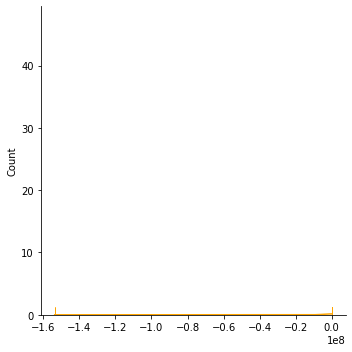

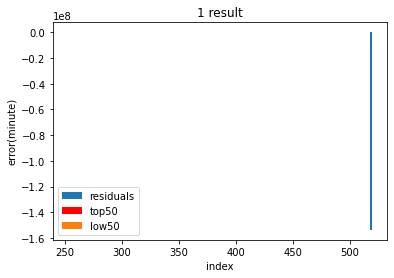

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

result_dfs = [test_df] # Replace with actual dataframes
# result_dfs = [result_df_1, result_df_2, result_df_3, result_df_4, result_df_5] # Replace with actual dataframes

for i, df in enumerate(result_dfs):
    case_index = str(i+1)
    print(f"{case_index}번 케이스")
    print("최대:", df.loc[df.index[:-20]]["error"].max())
    print("평균:", df.loc[df.index[:-20]]["error"].mean())
    sns.displot(df["error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
    plt.show()

    error_sorted = df.sort_values('error')
    high_threshold = error_sorted.iloc[50]["error"]
    low_threshold = error_sorted.iloc[-50]["error"]
    
    high_errors = df[df['error'] < high_threshold]
    low_errors = df[df['error'] > low_threshold]
    plt.bar(df["index"].values, df["error"].values.astype(float) /(1e9 * 60), label="residuals")
    plt.bar(high_errors["index"].values, high_errors["error"].values.astype(float) /(1e9 * 60), label="top50", color="red")
    plt.bar(low_errors["index"].values, low_errors["error"].values.astype(float) /(1e9 * 60), label="low50")
    
    plt.xlabel("index")
    plt.ylabel("error(minute)")
    plt.legend()
    plt.title(f"{case_index} result")
    plt.show()
    print("="*100)


In [35]:
for sam in test_df.index:
    # 테스트 데이터
    re_sample = test_processed_df.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_timestamp = pd.to_datetime(re_sample["timestamp"])
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == processed_df.loc[processed_df.index[-1],"index"]:
        continue
    
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = processed_df.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
#     print(distance/km_h)
    init_duration = cal_duration(km_h, distance)
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
        newly_start = True
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        newly_start = False
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 initial segment의 끝까지 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    if newly_start:
        seg_no += 1
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
#         if d.loc[d.index[-1],"index"] > stop_index:
#             for i2 in d.index:
#                 d_index = d.loc[i2, "index"]
#                 if d_index > stop_index:
#                     d = d.loc[:i2,:]
#                     break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
            
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    test_processed_df.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    test_processed_df.loc[sam, 'ATA'] = ATA
    test_processed_df.loc[sam, 'error'] = abs(ETA - ATA)

In [36]:
# ddd = sample.loc[20:,:]
result_df_1 = test_processed_df.loc[test_processed_df['error'].dropna(axis=0).index]
result_df_1

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,253,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,1543.819174,2022-11-21 17:35:45.467213,2022-11-21 16:50:10.106911,0 days 00:45:35.360302
1,254,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,1534.840724,2022-11-21 17:45:50.018305,2022-11-21 16:50:10.106911,0 days 00:55:39.911394
2,255,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,1526.917966,2022-11-21 17:55:56.528966,2022-11-21 16:50:10.106911,0 days 01:05:46.422055
3,256,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,1522.582870,2022-11-21 18:00:59.783607,2022-11-21 16:50:10.106911,0 days 01:10:49.676696
4,257,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 18:29:47.125983,2022-11-21 16:50:10.106911,0 days 01:39:37.019072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 18:22:40.109492,2022-11-21 16:50:10.106911,0 days 01:32:30.002581
262,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 18:13:24.786846,2022-11-21 16:50:10.106911,0 days 01:23:14.679935
263,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 18:31:28.261819,2022-11-21 16:50:10.106911,0 days 01:41:18.154908
264,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 18:28:12.261900,2022-11-21 16:50:10.106911,0 days 01:38:02.154989


In [37]:
result_df_1["eta"] = pd.to_datetime(result_df_1["eta"])
result_df_1.drop(columns=["mmsi", "imo", "CAPACITY",'time_position_data_received','time_voyage_data_received','estimated_fuel_consumption'], inplace=True)
result_df_1["AIS_ETA_error"] = abs(result_df_1["eta"] - result_df_1["ATA"])

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용 (2번)

In [38]:
# 샘플 데이터는 20부터. 
for sam in test_processed_df.index:
    re_sample = test_processed_df.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 1. 순간 속력 (AIS) 
    current_speed = re_sample["speed"]
    current_timestamp = pd.to_datetime(re_sample["timestamp"])
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == processed_df.loc[processed_df.index[-1],"index"]:
        continue
    
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = processed_df.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
#     print(distance/km_h)
    init_duration = cal_duration(km_h, distance)
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
        newly_start = True
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        newly_start = False
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 initial segment의 끝까지 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    if newly_start:
        seg_no += 1
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
#         if d.loc[d.index[-1],"index"] > stop_index:
#             for i2 in d.index:
#                 d_index = d.loc[i2, "index"]
#                 if d_index > stop_index:
#                     d = d.loc[:i2,:]
#                     break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
            
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    test_processed_df.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    test_processed_df.loc[sam, 'ATA'] = ATA
    test_processed_df.loc[sam, 'error'] = abs(ETA - ATA)

In [39]:
# ddd = sample.loc[20:,:]
result_df_2 = test_processed_df.loc[test_processed_df['error'].dropna(axis=0).index]
result_df_2

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,253,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,1543.819174,2022-11-21 15:45:59.497706,2022-11-21 16:50:10.106911,0 days 01:04:10.609205
1,254,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,1534.840724,2022-11-21 15:56:04.048798,2022-11-21 16:50:10.106911,0 days 00:54:06.058113
2,255,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,1526.917966,2022-11-21 16:06:10.559459,2022-11-21 16:50:10.106911,0 days 00:43:59.547452
3,256,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,1522.582870,2022-11-21 16:11:13.814100,2022-11-21 16:50:10.106911,0 days 00:38:56.292811
4,257,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 16:26:21.178314,2022-11-21 16:50:10.106911,0 days 00:23:48.928597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 17:43:55.101888,2022-11-21 16:50:10.106911,0 days 00:53:44.994977
262,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 17:48:57.579899,2022-11-21 16:50:10.106911,0 days 00:58:47.472988
263,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 18:04:05.595647,2022-11-21 16:50:10.106911,0 days 01:13:55.488736
264,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 18:09:13.574354,2022-11-21 16:50:10.106911,0 days 01:19:03.467443


In [40]:
result_df_2["eta"] = pd.to_datetime(result_df_2["eta"])


In [41]:
result_df_2.drop(columns=["mmsi", "imo", "CAPACITY",'time_position_data_received','time_voyage_data_received','estimated_fuel_consumption'], inplace=True)

In [42]:
# result_df["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [43]:
result_df_2["AIS_ETA_error"] = abs(result_df_2["eta"] - result_df_2["ATA"])

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


# 전체 구간 평균 속도 (3번)

In [44]:
avg_speed_list = [] 
# 샘플 데이터는 20부터. 
for sam in test_processed_df.index:
    re_sample = test_processed_df.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 3. 전체 구간 평균 속력
    current_speed = re_sample["speed"]
    avg_speed_list.append(current_speed)
    avg_speed = np.mean(avg_speed_list)
    
    current_timestamp = pd.to_datetime(re_sample["timestamp"])
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == processed_df.loc[processed_df.index[-1],"index"]:
        continue
    
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = processed_df.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = avg_speed * 1.852
#     print(distance/km_h)
    init_duration = cal_duration(km_h, distance)
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
        newly_start = True
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        newly_start = False
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 initial segment의 끝까지 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    if newly_start:
        seg_no += 1
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
#         if d.loc[d.index[-1],"index"] > stop_index:
#             for i2 in d.index:
#                 d_index = d.loc[i2, "index"]
#                 if d_index > stop_index:
#                     d = d.loc[:i2,:]
#                     break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = avg_speed
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
            
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    test_processed_df.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    test_processed_df.loc[sam, 'ATA'] = ATA
    test_processed_df.loc[sam, 'error'] = abs(ETA - ATA)

In [45]:
# ddd = sample.loc[20:,:]
result_df_3 = test_processed_df.loc[test_processed_df['error'].dropna(axis=0).index]
result_df_3

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,253,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,1543.819174,2022-11-21 19:40:03.643783,2022-11-21 16:50:10.106911,0 days 02:49:53.536872
1,254,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,1534.840724,2022-11-21 19:50:08.194875,2022-11-21 16:50:10.106911,0 days 02:59:58.087964
2,255,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,1526.917966,2022-11-21 20:00:14.705536,2022-11-21 16:50:10.106911,0 days 03:10:04.598625
3,256,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,1522.582870,2022-11-21 20:05:17.960177,2022-11-21 16:50:10.106911,0 days 03:15:07.853266
4,257,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 20:23:17.625509,2022-11-21 16:50:10.106911,0 days 03:33:07.518598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 17:09:18.059049,2022-11-21 16:50:10.106911,0 days 00:19:07.952138
262,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 17:14:27.839271,2022-11-21 16:50:10.106911,0 days 00:24:17.732360
263,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 17:29:43.318677,2022-11-21 16:50:10.106911,0 days 00:39:33.211766
264,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 17:34:58.156855,2022-11-21 16:50:10.106911,0 days 00:44:48.049944


In [46]:
result_df_3["eta"] = pd.to_datetime(result_df_3["eta"])
result_df_3.drop(columns=["mmsi", "imo", "CAPACITY",'time_position_data_received','time_voyage_data_received','estimated_fuel_consumption'], inplace=True)
result_df_3["AIS_ETA_error"] = abs(result_df_3["eta"] - result_df_3["ATA"])

# 구간 간의 평균 (segments 사이의 속도 평균) (4번)
급격하게 속도가 감소해도 보정이 가능

In [47]:
avg_speed_list = [] 
seg_avg_speed_list = []
# 샘플 데이터는 20부터. 
for sam in test_processed_df.index:
    re_sample = test_processed_df.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    
    # 3. 전체 구간 평균 속력
    current_speed = re_sample["speed"]
    avg_speed_list.append(current_speed)
    avg_speed = np.mean(avg_speed_list)
    
    current_timestamp = pd.to_datetime(re_sample["timestamp"])
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == processed_df.loc[processed_df.index[-1],"index"]:
        continue
    
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = processed_df.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = avg_speed * 1.852
#     print(distance/km_h)
    init_duration = cal_duration(km_h, distance)
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
        newly_start = True
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        newly_start = False
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 initial segment의 끝까지 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    if newly_start:
        seg_no += 1
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
#         if d.loc[d.index[-1],"index"] > stop_index:
#             for i2 in d.index:
#                 d_index = d.loc[i2, "index"]
#                 if d_index > stop_index:
#                     d = d.loc[:i2,:]
#                     break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            # 4. 구간 간의 평균 
            seg_avg_speed_list.append(mean_speed)
            seg_avg_speed = np.mean(seg_avg_speed_list)
            damped_mean_speed = seg_avg_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
            
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    test_processed_df.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    test_processed_df.loc[sam, 'ATA'] = ATA
    test_processed_df.loc[sam, 'error'] = abs(ETA - ATA)

In [48]:
# ddd = sample.loc[20:,:]
result_df_4 = test_processed_df.loc[test_processed_df['error'].dropna(axis=0).index]
result_df_4

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,253,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,1543.819174,2022-11-21 15:30:58.702251,2022-11-21 16:50:10.106911,0 days 01:19:11.404660
1,254,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,1534.840724,2022-11-21 16:16:26.695662,2022-11-21 16:50:10.106911,0 days 00:33:43.411249
2,255,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,1526.917966,2022-11-21 16:35:24.104842,2022-11-21 16:50:10.106911,0 days 00:14:46.002069
3,256,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,1522.582870,2022-11-21 16:44:22.367000,2022-11-21 16:50:10.106911,0 days 00:05:47.739911
4,257,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 17:01:42.565618,2022-11-21 16:50:10.106911,0 days 00:11:32.458707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 17:07:31.217267,2022-11-21 16:50:10.106911,0 days 00:17:21.110356
262,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 17:12:34.512197,2022-11-21 16:50:10.106911,0 days 00:22:24.405286
263,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 17:27:43.344254,2022-11-21 16:50:10.106911,0 days 00:37:33.237343
264,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 17:32:52.138659,2022-11-21 16:50:10.106911,0 days 00:42:42.031748


In [49]:
result_df_4["eta"] = pd.to_datetime(result_df_4["eta"])
result_df_4.drop(columns=["mmsi", "imo", "CAPACITY",'time_position_data_received','time_voyage_data_received','estimated_fuel_consumption'], inplace=True)
result_df_4["AIS_ETA_error"] = abs(result_df_4["eta"] - result_df_4["ATA"])

# 속도 보정(두 점의 위치 시간 차이로 속도 계산) (5번)
ais speed 사용 x

In [50]:
avg_speed_list = [] 
seg_avg_speed_list = []
# 샘플 데이터는 20부터. 
for sam in test_processed_df.index:
    if sam == 0:
        continue
        
    re_sample = test_processed_df.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_position_time = pd.to_datetime(re_sample["time_position_data_received"])
    current_point = (latitude, longitude)
    
    # 바로 직전 위치
    previous_re_sample = test_processed_df.loc[sam-1,:]
    prev_longitude = previous_re_sample["longitude"]
    prev_latitude = previous_re_sample["latitude"]
    prev_position_time = pd.to_datetime(previous_re_sample["time_position_data_received"])
    previous_point = (prev_latitude, prev_longitude)
    
    # 이동한 거리 (변위)
    displacement = haversine(current_point, previous_point, unit="km")
    # 걸린 시간
    time_diff = abs(current_position_time - prev_position_time)
    # 5. 실제 속도
    real_speed = displacement / (time_diff.total_seconds() / 3600)

    
    
#     # 3. 전체 구간 평균 속력
#     current_speed = re_sample["speed"]
#     avg_speed_list.append(current_speed)
#     avg_speed = np.mean(avg_speed_list)
    
    current_timestamp = pd.to_datetime(re_sample["timestamp"])
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance <= shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == processed_df.loc[processed_df.index[-1],"index"]:
        continue
    
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = processed_df.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = real_speed
#     km_h = avg_speed * 1.852
#     print(distance/km_h)
    init_duration = cal_duration(km_h, distance)
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
        newly_start = True
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        newly_start = False
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 initial segment의 끝까지 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    
    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    if newly_start:
        seg_no += 1
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/cosco_fos_{voyage_number}_segment_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            d_mean_speed_list = []
            for mean_idx in d.index:
            
                if mean_idx != 0:
                    dd = d.loc[mean_idx,:]
                    d_longitude = dd["longitude"]
                    d_latitude = dd["latitude"]
                    current_d_position_time = pd.to_datetime(dd["time_position_data_received"])
                    current_d_point = (d_latitude, d_longitude)

                    # 바로 직전 위치
                    previous_dd = d.loc[mean_idx-1,:]
                    prev_d_longitude = previous_dd["longitude"]
                    prev_d_latitude = previous_dd["latitude"]
                    prev_d_position_time = pd.to_datetime(previous_dd["time_position_data_received"])
                    previous_d_point = (prev_d_latitude, prev_d_longitude)

                    # 이동한 거리 (변위)
                    d_displacement = haversine(current_d_point, previous_d_point, unit="km")
                    # 걸린 시간
                    d_time_diff = abs(current_d_position_time - prev_d_position_time)
                    # 5. 실제 속도
                    d_real_speed = d_displacement / (d_time_diff.total_seconds() / 3600)
                    d_mean_speed_list.append(d_real_speed)
            mean_speed = np.mean(d_mean_speed_list)
#             mean_speed = d["speed"].mean()
#             print(mean_speed)
            # 4. 구간 간의 평균 
#             seg_avg_speed_list.append(mean_speed)
#             seg_avg_speed = np.mean(seg_avg_speed_list)
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed
#             km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
            
    accu_timedelta = datetime.timedelta(seconds=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    test_processed_df.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    test_processed_df.loc[sam, 'ATA'] = ATA
    test_processed_df.loc[sam, 'error'] = abs(ETA - ATA)

In [51]:
# ddd = sample.loc[20:,:]
result_df_5 = test_processed_df.loc[test_processed_df['error'].dropna(axis=0).index]
result_df_5

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
0,253,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.7631,38.6700,16.4,93.0,2022-11-20 04:28:09.027197,2022-11-19 19:23:57,2022-11-19 06:37:05,under way using engine,904.478919,1543.819174,2022-11-21 15:30:58.702251,2022-11-21 16:50:10.106911,0 days 01:19:11.404660
1,254,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8281,38.6674,16.4,93.0,2022-11-20 04:38:13.578289,2022-11-19 19:35:03,2022-11-19 06:37:05,under way using engine,899.218705,1534.840724,2022-11-21 17:01:01.015749,2022-11-21 16:50:10.106911,0 days 00:10:50.908838
2,255,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.8854,38.6649,16.4,93.0,2022-11-20 04:48:20.088950,2022-11-19 19:45:04,2022-11-19 06:37:05,under way using engine,894.576991,1526.917966,2022-11-21 17:11:07.526410,2022-11-21 16:50:10.106911,0 days 00:20:57.419499
3,256,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.9167,38.6634,16.4,93.0,2022-11-20 04:53:23.343591,2022-11-19 19:50:20,2022-11-19 06:37:05,under way using engine,892.037184,1522.582870,2022-11-21 17:16:10.781051,2022-11-21 16:50:10.106911,0 days 00:26:00.674140
4,257,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,120.0053,38.6558,16.3,97.0,2022-11-20 05:08:30.707805,2022-11-19 20:05:53,2022-11-19 06:37:05,under way using engine,884.698235,1499.571107,2022-11-21 17:31:18.145265,2022-11-21 16:50:10.106911,0 days 00:41:08.038354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 17:44:31.515354,2022-11-21 16:50:10.106911,0 days 00:54:21.408443
262,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 17:49:33.993365,2022-11-21 16:50:10.106911,0 days 00:59:23.886454
263,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 18:04:42.009113,2022-11-21 16:50:10.106911,0 days 01:14:31.902202
264,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 18:09:49.987820,2022-11-21 16:50:10.106911,0 days 01:19:39.880909


In [52]:
result_df_5["eta"] = pd.to_datetime(result_df_5["eta"])
result_df_5.drop(columns=["mmsi", "imo", "CAPACITY",'time_position_data_received','time_voyage_data_received','estimated_fuel_consumption'], inplace=True)
result_df_5["AIS_ETA_error"] = abs(result_df_5["eta"] - result_df_5["ATA"])

# 결과 비교

1번 케이스
최대: 0 days 06:35:05.746052
평균: 0 days 01:46:24.805882426


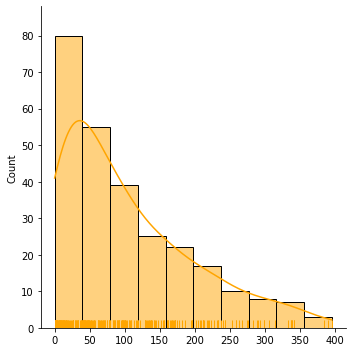

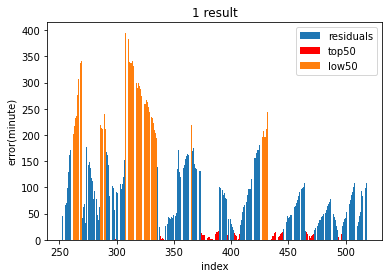

2번 케이스
최대: 0 days 06:29:15.946388
평균: 0 days 01:36:03.823278300


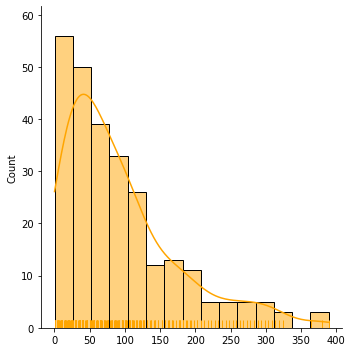

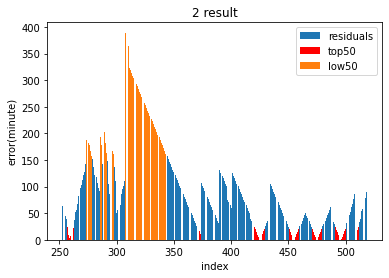

3번 케이스
최대: 0 days 07:03:11.836617
평균: 0 days 02:04:10.121682772


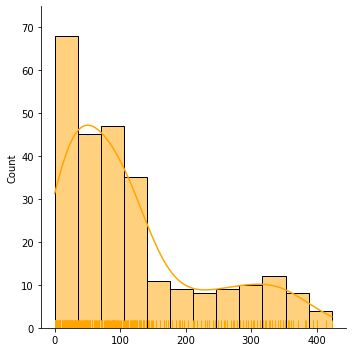

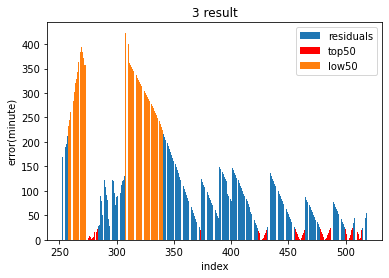

4번 케이스
최대: 0 days 06:50:39.938386
평균: 0 days 01:48:09.192644154


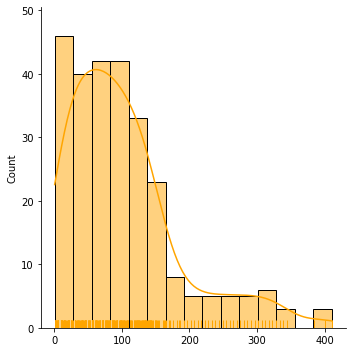

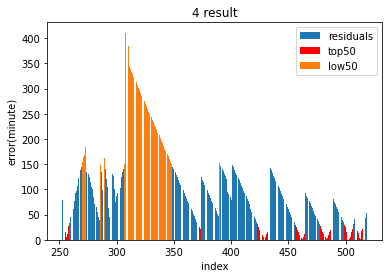

5번 케이스
최대: 0 days 06:25:57.305758
평균: 0 days 01:34:02.092393272


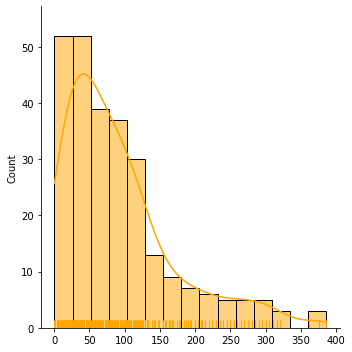

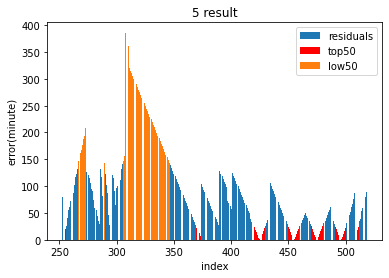

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

result_dfs = [result_df_1, result_df_2, result_df_3, result_df_4, result_df_5] # Replace with actual dataframes

for i, df in enumerate(result_dfs):
    case_index = str(i+1)
    print(f"{case_index}번 케이스")
    print("최대:", df.loc[df.index[:-20]]["error"].max())
    print("평균:", df.loc[df.index[:-20]]["error"].mean())
    sns.displot(df["error"].values.astype(float) / (1e9 * 60), kde=True, rug=True, color="orange")
    plt.show()

    error_sorted = df.sort_values('error')
    high_threshold = error_sorted.iloc[50]["error"]
    low_threshold = error_sorted.iloc[-50]["error"]
    
    high_errors = df[df['error'] < high_threshold]
    low_errors = df[df['error'] > low_threshold]
    plt.bar(df["index"].values, df["error"].values.astype(float) /(1e9 * 60), label="residuals")
    plt.bar(high_errors["index"].values, high_errors["error"].values.astype(float) /(1e9 * 60), label="top50", color="red")
    plt.bar(low_errors["index"].values, low_errors["error"].values.astype(float) /(1e9 * 60), label="low50")
    
    plt.xlabel("index")
    plt.ylabel("error(minute)")
    plt.legend()
    plt.title(f"{case_index} result")
    plt.show()
    print("="*100)
